<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment12/B/K-mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
from PIL import Image
data = json.load(open('dogdata.json'))

In [0]:
c = data['_via_img_metadata'] 

In [0]:
width_arr =[]
height_arr = []
for i in c:
  k = c[i]
  flname= k['filename']
  img = Image.open(flname)
  w,h= img.size
  l = k['regions'][0]
  m = l['shape_attributes']
  width = m['width']/w
  height = m['height']/h
  height_arr.append(height)
  width_arr.append(width)


In [0]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'height vs width plot')

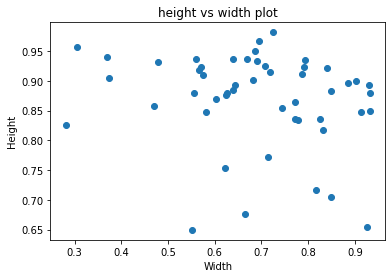

In [102]:
plt.scatter(width_arr,height_arr)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('height vs width plot')

In [0]:
import math
logwidth_arr = []
logheight_arr = []
for i in range(50):
  logwidth_arr.append(math.log(width_arr[i]))
  logheight_arr.append( math.log(height_arr[i]))

Text(0.5, 1.0, 'log height vs log width plot')

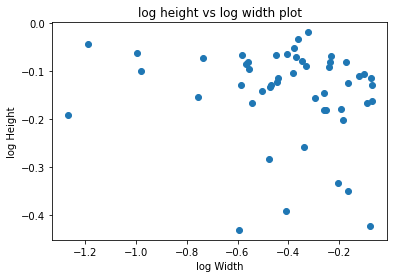

In [104]:
plt.scatter(logwidth_arr,logheight_arr)
plt.xlabel('log Width')
plt.ylabel('log Height')
plt.title('log height vs log width plot')

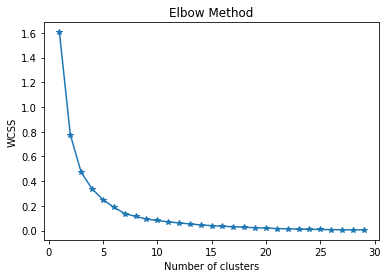

In [110]:
from sklearn.cluster import KMeans 
import numpy as np
wcss = []
arr=[]
a= np.array(width_arr)
a=a.reshape(50,1)
b = np.array(height_arr)
b= b.reshape(50,1)
arr =np.concatenate((a,b),axis=1)
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(arr)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss,'-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




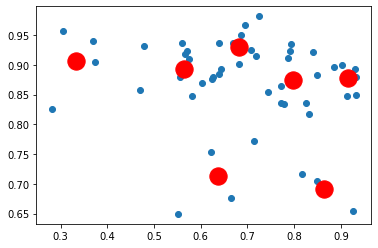

In [109]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(arr)
plt.scatter(width_arr,height_arr)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()